## Car Crashes in Montgomery County EDA

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 50)

### Import Data

In [19]:
# Original crash data
crash_orig_df = pd.read_csv('./data/crash_reporting_drivers_data.csv', low_memory=False)
crash_orig_df['Crash Date/Time'] = pd.to_datetime(crash_orig_df['Crash Date/Time'])

In [5]:
# Modified crash data
crash_mod_df = pd.read_csv('./data/crash_data_modified.csv', low_memory=False)

In [6]:
# Categorized crash data
crash_cats_df = pd.read_csv('./data/crash_categorical.csv', low_memory=False)

### Functions

In [7]:
# Prints subplots (sns.countplots) for drivers at fault, under the influence, and distracted in crashes
# Percentages on bars idea from:
#### https://stackoverflow.com/a/63479557
#### https://www.tutorialspoint.com/how-to-add-percentages-on-top-of-bars-in-seaborn-using-matplotlib

def get_fault_drug_distracted(daf, dsa, dd):
    fig = plt.figure(figsize = (15,5))
    
    ax1 = fig.add_subplot(1,3,1)
    total1 = float(crash_mod_df[daf].count())
    ax_1 = sns.countplot(data = crash_mod_df, x = daf, ax=ax1)
    for p in ax_1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax_1.annotate(percentage, (x, y),ha='center')
    
    ax2 = fig.add_subplot(1,3,2)
    total2 = float(crash_mod_df[dsa].count())
    ax_2 = sns.countplot(data = crash_mod_df, x = dsa, ax=ax2)
    for p in ax_2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax_2.annotate(percentage, (x, y),ha='center')
    
    ax3 = fig.add_subplot(1,3,3)
    total3 = float(crash_mod_df[dsa].count())
    ax_3 = sns.countplot(data = crash_mod_df, x = dd, ax=ax3);
    for p in ax_3.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total3)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax_3.annotate(percentage, (x, y),ha='center')

In [98]:
# gets sns.countplot for one feature
def get_count(df, feature):
    plt.figure(figsize = (15,5))
    plt.title(f'Count of Crashes by {feature}')
    total = float(df[feature].count())
    plt.xticks(rotation = 50)
    ax = sns.countplot(data = df, x = feature);
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

In [94]:
def get_intersections(df):
    df_inters = df[['Road Name', 'Cross-Street Name']]
    df_inters1 = df_inters.dropna()
    # Needed to avoid nasty warning
    df_inters2 = df_inters1.copy(deep=True)
    df_inters2['intersection'] = df_inters2['Road Name'] + " and " + df_inters2['Cross-Street Name']
    
    plt.figure(figsize = (15,5))
    plt.title(f'Count of Crashes by Intersection')
    total = float(df_inters2['intersection'].count())
    plt.xticks(rotation = 50)
    ax = sns.countplot(data = df_inters2, x = 'intersection', 
                       order=df_inters2['intersection'].value_counts().iloc[:10].index);
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

In [34]:
# gets sns.countplot for one feature
def get_count_no_pct(df, feature):
    plt.figure(figsize = (15,5))
    plt.title(f'Count of Crashes by {feature}')
    plt.xticks([0,1,2,3,4,5,6],['2015','2016','2017','2018','2019','2020','2021(Jan-Nov)'])
    sns.countplot(data = df, x = feature);

### Yearly Crash Trend

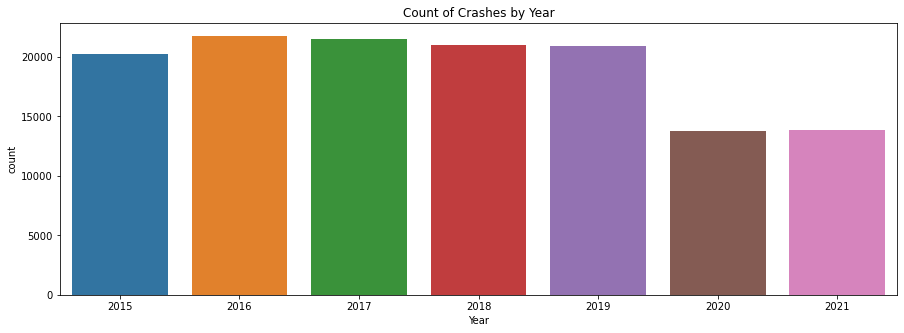

In [35]:
crash_orig_df['Year'] = crash_orig_df['Crash Date/Time'].dt.year
get_count_no_pct(crash_orig_df, 'Year')

### Counts: Driver at-fault, Driver Drug Abuse, and Driver Distracted

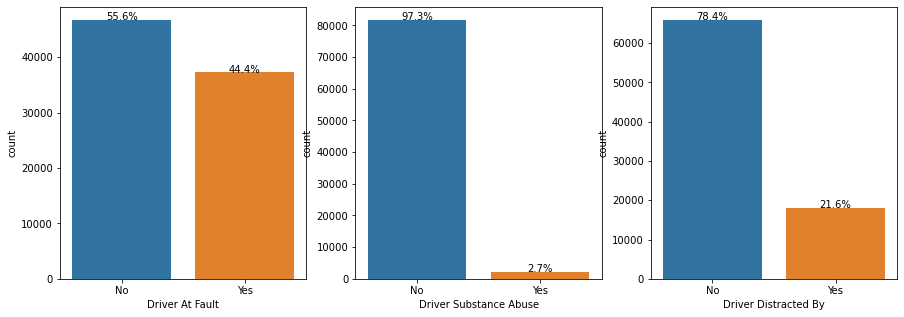

In [34]:
get_fault_drug_distracted('Driver At Fault', 'Driver Substance Abuse', 'Driver Distracted By')

### Count: Time of Day Crash Occurred

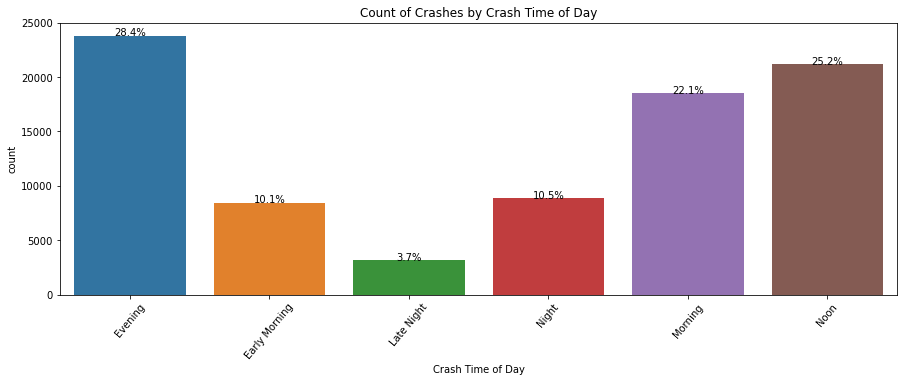

In [57]:
get_count(crash_mod_df, 'Crash Time of Day')

### Count: Surface Conditions at Time of Crash

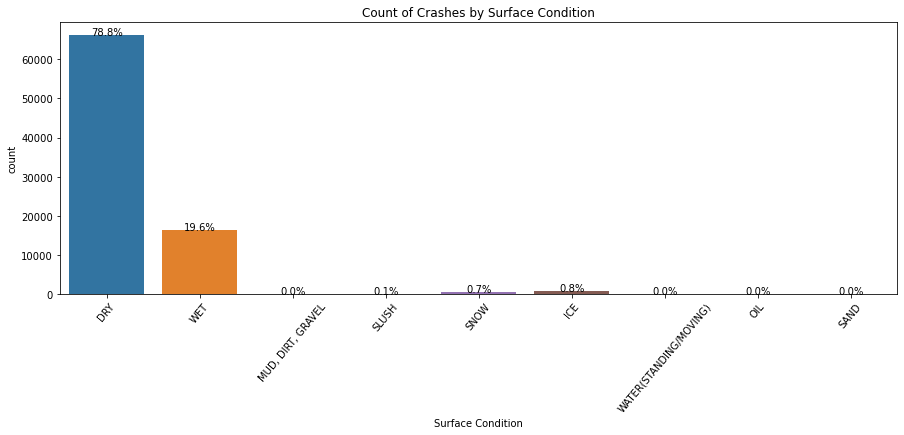

In [13]:
get_count(crash_mod_df, 'Surface Condition')

### Count: Weather Conditions at Time of Crash

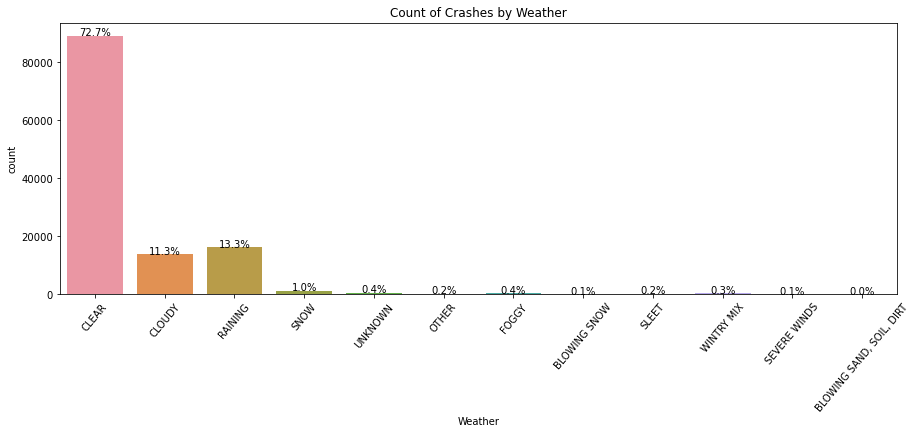

In [14]:
get_count(crash_orig_df, 'Weather')

### Count: Crashes by Intersection

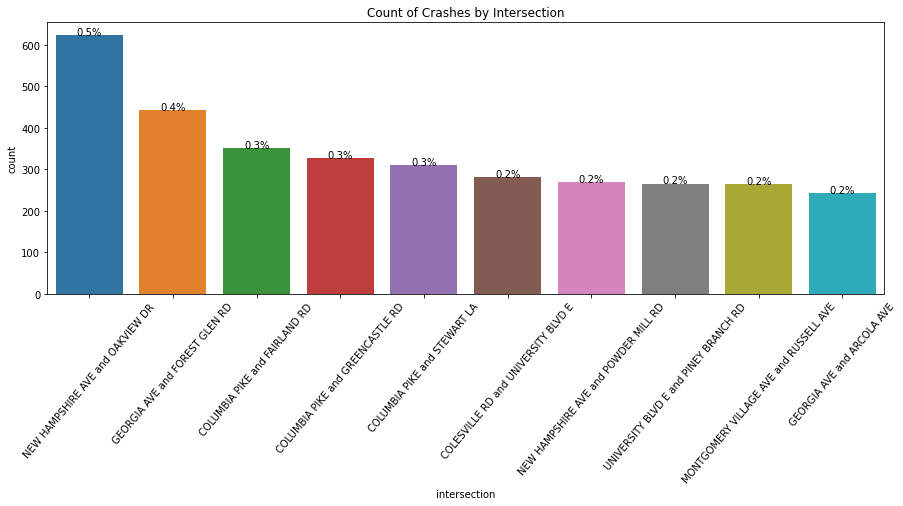

In [95]:
get_intersections(crash_orig_df)

### Count: Crash by Lighting

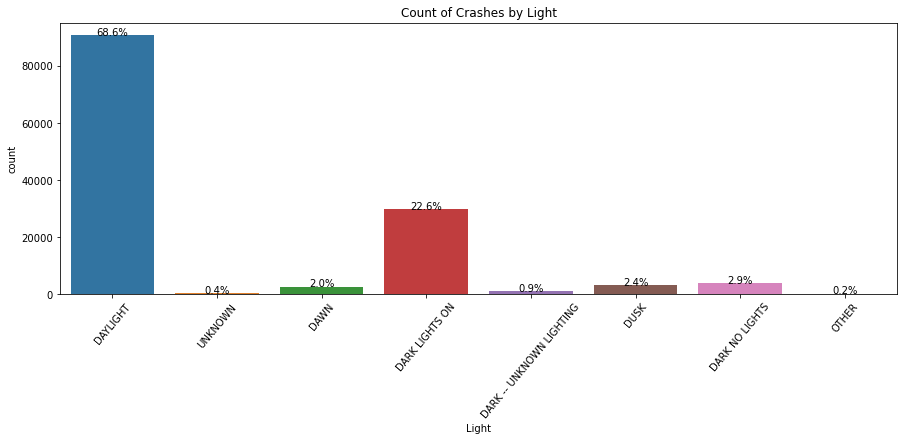

In [97]:
get_count(crash_orig_df, 'Light')